# Computer Vision: Ex.2

Submitted by: Antony Gozes


In [40]:
%matplotlib inline

import matplotlib.pyplot as plt
from imageio import imread
import numpy as np

## Linear 2-D Filter

Implement a 2-D linear filter function:

Input: 
- a grayscale image of size: $h\times w$
- a square kernel of odd size: $(2n+1)\times(2n+1)$

Output:
- a grayscale filtered image of size: $h\times w$

In [41]:
def filter2D(img_in, kernel):
    # check kernel dimensions
    ker_h, ker_w = kernel.shape
    if ker_h != ker_w:
        raise ValueError('expected square-size kernel')
    if ker_h % 2 == 0:
        raise ValueError('expected odd-size kernel')
    n = (ker_h - 1) // 2

    img_h, img_w = img_in.shape

    img_in_p = np.zeros((img_h + 2 * n, img_w + 2 * n))

    # add paddings
    for i in range(img_h):
        for j in range(img_w):
            img_in_p[i + n][j + n] = img_in[i][j]

    img_out = np.zeros((img_h, img_w))

    for i in range(img_h):
        for j in range(img_w):
            img_out[i][j] = (img_in_p[i:i + 2 * n + 1, j:j + 2 * n + 1] * kernel).sum()
    return img_out


In [42]:
# Sanity check: Verify that indeed you get what you expected,

Z = np.zeros((5,5))
Z[2,2] = 1 # an impulse function ('1' in the center)

print('input:')
print(Z)

print('output:')
print(filter2D(Z,np.ones((3,3)))) # filter's impulse response

input:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
output:
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0.]]


### Box filters

Load and display the 'zebra.jpeg' image.

Apply a box (uniform) filter of size $3\times3$ to the image, and display the result.

Try different sizes of the box-filter, from $3\times 3$, and up to $15\times 15$.

Display the results using subplots.



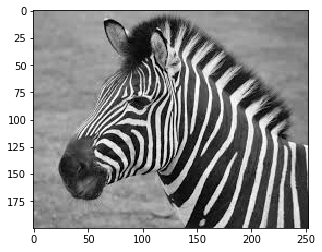

In [43]:
from skimage import io
zebra = io.imread('zebra.jpeg', as_grey=True)

#
# There was error reading this image with imageio imread to GRAYSCALE
#

plt.imshow(zebra, cmap="gray")
plt.show()


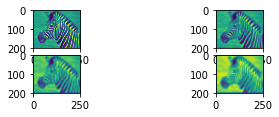

In [44]:
box_filter = (1/9) * np.ones((3,3))
for i,v in enumerate(range(3,18,4)):
    result = filter2D(zebra,np.ones((v,v)))
    plt.subplot(5,2,i+1).imshow(result)

plt.show()

### Different filters

Apply each of the following 6 filters to the zebra image and display the result. 



In [45]:
f1 = np.array([[0,0,0],
              [0,1,0],
              [0,0,0]])

              
f2 = np.array([[0,0,0],
              [0,0,1],
              [0,0,0]])  
              
f3 = np.array([[1,1,1],
              [1,1,1],
              [1,1,1]])               

f4 = np.array([[1,0,-1],
              [2,0,-2],
              [1,0,-1]])

f5 = np.array([[1,2,1],
              [0,0,0],
              [-1,-2,-1]])

f6 = np.array([[0,1,0],
              [1,-4,1],
              [0,1,0]])

filters = [f1,f2,f3,f4,f5,f6]



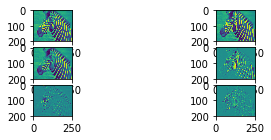

In [46]:
for i,v in enumerate(filters):
    result = filter2D(zebra,v)
    plt.subplot(len(filters),2,i+1).imshow(result)
plt.show()

Apply the same 6 filters to the following rectangle image:


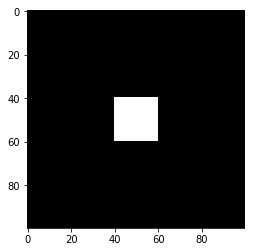

In [47]:
rect = np.zeros((100,100))
rect[40:60,40:60]=1
plt.imshow(rect, cmap="gray")
plt.show()

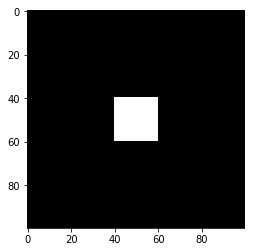

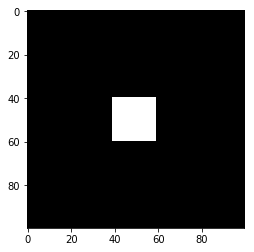

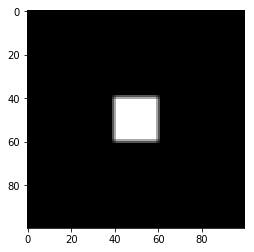

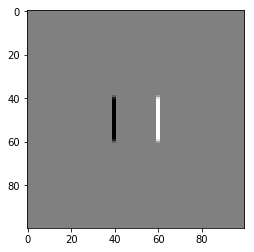

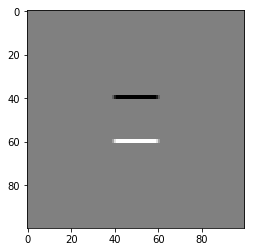

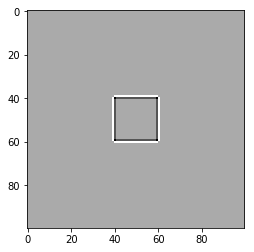

In [48]:

for i,v in enumerate(filters):
    result = filter2D(rect,v)
    plt.imshow(result,cmap='gray')
    plt.show()

Write in your own words (hebrew/english) the effect of each of these filters:

- f1: like no effect

- f2: the white square seems to be smaller

- f3: blur between black and white

- f4: its like sets the oposite color vertical

- f5: its like sets the oposite color horizontal

- f6: its like sets the oposite color in the edges vertical and horizontal



##  Binary morphology - Dilation & Erosion

Recall the definition of the 'dilation' and 'erosion' methods. 

Instead of using the logical operations (AND in erosion, OR in dilation) we can implement these methods by:

1. filter the (binary) image with a (binary) kernel
2. threshold the result with a specfic level

Implement the 'erosion' and 'dilation' functions using your 'filter2D' function. Assume the input image and the kernel are binary matrices ('0's and '1's). 

In [49]:
def erosion(binary_img, kernel):
    filtered_img = filter2D(binary_img, kernel)
    # your code here...   
    max_val = filtered_img.max()
    return filtered_img == max_val
    #return output_img # should be binary as well




def dilation(binary_img, kernel):
    filtered_img = filter2D(binary_img, kernel)
    
    min_val = filtered_img.min()
    return filtered_img > min_val

- Display the results of applying each of these morphological operations to the following "J" image. Use a uniform $5\times 5$ kernel.

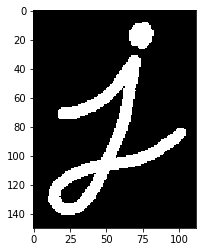

In [50]:
from skimage import io

J = io.imread('j.png', as_grey=True)
J = J / J.max() 
plt.imshow(J, cmap="gray")
plt.show()

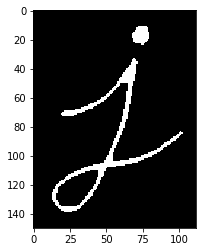

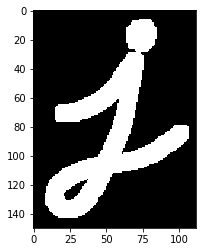

In [51]:
filter_box5 =  np.ones((5,5))
result = erosion(J,filter_box5)
plt.imshow(result,cmap='gray')
plt.show()
result = dilation(J,filter_box5)
plt.imshow(result,cmap='gray')
plt.show()

## Binary morphology - Opening & Closing

"Opening" is just another name of erosion followed by dilation. It is useful in removing noise.

Apply "opening" on the noisy image below, and display the result:

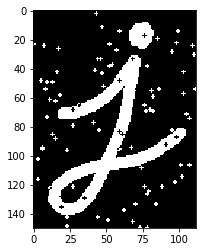

In [52]:
from skimage import io

J = io.imread('j_noise.png',as_grey=True)
J = J / J.max() 
plt.imshow(J, cmap="gray")
plt.show()

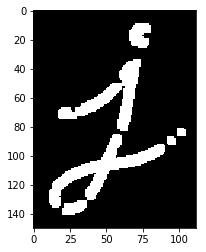

In [53]:
opening_img = dilation(erosion(J,filter_box5),filter_box5)
plt.imshow(opening_img,cmap='gray')
plt.show()

"Closing" is reverse of Opening: Dilation followed by Erosion. It is useful in closing small holes inside the foreground objects, or small black points on the object.

Apply "closing" on the reult of your last manipulation.

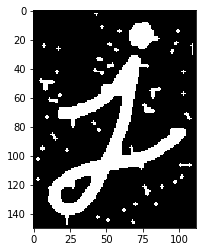

In [54]:
opening_img = erosion(dilation(J,filter_box5),filter_box5)
plt.imshow(opening_img,cmap='gray')
plt.show()

## Good Luck!